In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import requests
import bs4 as bs
import pickle

In [2]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})

    tickers = []

    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)


    return tickers

In [3]:
stocks = pd.read_csv('S&P500-Symbols.csv')
stocks
tickers = save_sp500_tickers()
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF-B',
 'CHRW',
 'COG',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP

In [4]:
plt.style.use('fivethirtyeight')

#Get the data for apple and output some data
ticker = input('Which stock would you like to train: ')

df = web.DataReader(ticker, data_source='yahoo', start='2015-01-01', end='2021-04-01')
print(df.head(20))

Which stock would you like to train: MMM
                  High         Low        Open       Close     Volume  \
Date                                                                    
2015-01-02  165.080002  162.729996  164.710007  164.059998  2116400.0   
2015-01-05  163.639999  160.080002  163.000000  160.360001  3692900.0   
2015-01-06  161.369995  157.740005  160.820007  158.649994  3532000.0   
2015-01-07  160.279999  158.940002  159.899994  159.800003  3081300.0   
2015-01-08  163.690002  160.520004  160.649994  163.630005  3142900.0   
2015-01-09  164.000000  161.270004  163.850006  161.619995  2378600.0   
2015-01-12  162.389999  160.020004  162.389999  160.740005  2149200.0   
2015-01-13  164.380005  159.449997  162.229996  160.619995  2703000.0   
2015-01-14  160.529999  158.500000  159.039993  159.839996  1983500.0   
2015-01-15  161.440002  159.369995  160.889999  159.660004  1876800.0   
2015-01-16  162.179993  159.089996  159.860001  162.000000  2349700.0   
2015-01-20

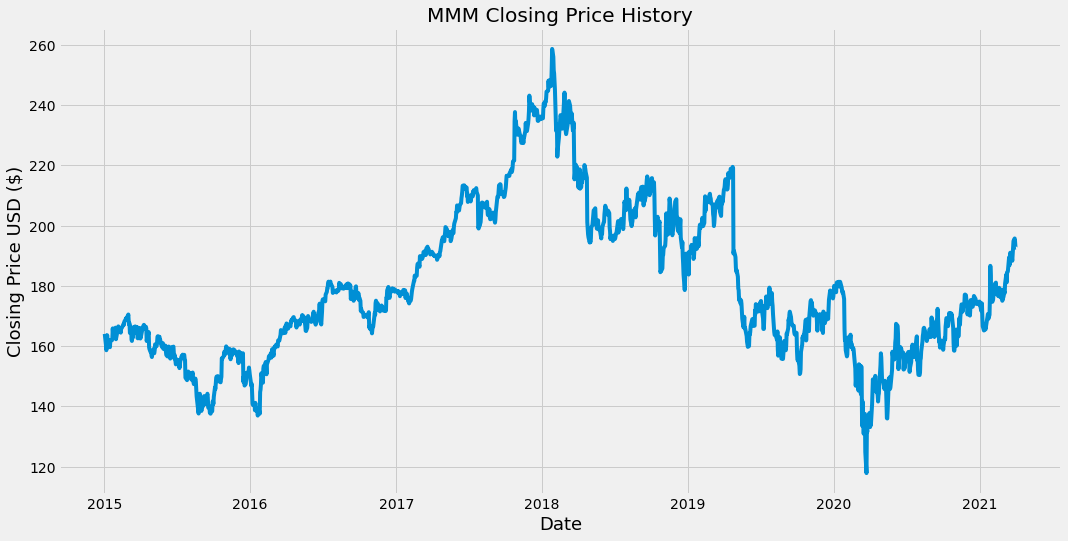

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title(f'{ticker} Closing Price History' )
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])
data

,Close
Date,
2015-01-02,164.059998
2015-01-05,160.360001
2015-01-06,158.649994
2015-01-07,159.800003
2015-01-08,163.630005
...,...
2021-03-26,194.880005
2021-03-29,195.740005
2021-03-30,194.639999


In [7]:
#Convert the dataframe to a numpy array
dataset = data.values
dataset

array([[164.05999756],
       [160.36000061],
       [158.6499939 ],
       ...,
       [194.63999939],
       [192.67999268],
       [192.69999695]])

In [8]:
#Get the number of rows to train the model on, training 80% of the data set
ds = str(len(dataset))
print("total dataset: " + ds)
training_data_len = math.ceil(len(dataset) * .8)
print(training_data_len)

total dataset: 1573
1259


In [9]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.32814716]
 [0.3018613 ]
 [0.28971292]
 ...
 [0.54539639]
 [0.53147193]
 [0.53161405]]


In [10]:
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]

In [27]:
#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)



[array([0.32814716, 0.3018613 , 0.28971292, 0.29788292, 0.32509237,
       0.31081267, 0.30456097, 0.30370838, 0.29816704, 0.29688832,
       0.31351234, 0.3130861 , 0.31734861, 0.34114802, 0.32786304,
       0.32942599, 0.32509237, 0.32729468, 0.34285309, 0.31564365,
       0.33070471, 0.34150326, 0.33347538, 0.34583688, 0.34242685,
       0.3336885 , 0.34065078, 0.33113095, 0.34129014, 0.34150326,
       0.34846544, 0.35187546, 0.34967315, 0.35699056, 0.36189254,
       0.36409485, 0.3624609 , 0.367576  , 0.36075583, 0.37389881,
       0.35805627, 0.3501705 , 0.35308329, 0.33027847, 0.34455805,
       0.31535941, 0.31159415, 0.33105994, 0.31876955, 0.34342145,
       0.32935488, 0.34526853, 0.33951407, 0.34541064, 0.34285309,
       0.34420293, 0.31848532, 0.31770384, 0.32416877, 0.34228474])]
[0.33446997362287023]


In [12]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
print(y_train)

[[0.32814716 0.3018613  0.28971292 ... 0.31770384 0.32416877 0.34228474]
 [0.3018613  0.28971292 0.29788292 ... 0.32416877 0.34228474 0.33446997]
 [0.28971292 0.29788292 0.32509237 ... 0.34228474 0.33446997 0.3172066 ]
 ...
 [0.26541626 0.26960787 0.25326798 ... 0.41780328 0.41716392 0.42192378]
 [0.26960787 0.25326798 0.23351806 ... 0.41716392 0.42192378 0.41176469]
 [0.25326798 0.23351806 0.23529413 ... 0.42192378 0.41176469 0.4159562 ]]
[0.33446997 0.3172066  0.31919579 ... 0.41176469 0.4159562  0.44138957]


In [13]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1199, 60, 1)


In [14]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1199/1199 [==============================] - 23s 18ms/step - loss: 0.0060


In [17]:
#Create the testing dataset
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: 2003, :]

In [18]:
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [19]:
#Convert the data to a numpy array for lstm model
x_test = np.array(x_test)
x_test

array([[0.23351806, 0.23529413, 0.24467174, ..., 0.41176469, 0.4159562 ,
        0.44138957],
       [0.23529413, 0.24467174, 0.28580565, ..., 0.4159562 , 0.44138957,
        0.4303779 ],
       [0.24467174, 0.28580565, 0.3029269 , ..., 0.44138957, 0.4303779 ,
        0.43158562],
       ...,
       [0.40437617, 0.38363165, 0.38157146, ..., 0.53445583, 0.54710146,
        0.55321115],
       [0.38363165, 0.38157146, 0.40011366, ..., 0.54710146, 0.55321115,
        0.54539639],
       [0.38157146, 0.40011366, 0.36835747, ..., 0.55321115, 0.54539639,
        0.53147193]])

In [20]:
#Reshape the data because we need 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.23351806],
        [0.23529413],
        [0.24467174],
        ...,
        [0.41176469],
        [0.4159562 ],
        [0.44138957]],

       [[0.23529413],
        [0.24467174],
        [0.28580565],
        ...,
        [0.4159562 ],
        [0.44138957],
        [0.4303779 ]],

       [[0.24467174],
        [0.28580565],
        [0.3029269 ],
        ...,
        [0.44138957],
        [0.4303779 ],
        [0.43158562]],

       ...,

       [[0.40437617],
        [0.38363165],
        [0.38157146],
        ...,
        [0.53445583],
        [0.54710146],
        [0.55321115]],

       [[0.38363165],
        [0.38157146],
        [0.40011366],
        ...,
        [0.54710146],
        [0.55321115],
        [0.54539639]],

       [[0.38157146],
        [0.40011366],
        [0.36835747],
        ...,
        [0.55321115],
        [0.54539639],
        [0.53147193]]])

In [21]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[179.56381],
       [180.03857],
       [180.41495],
       [180.58919],
       [181.028  ],
       [181.60466],
       [182.06487],
       [182.47176],
       [182.85768],
       [182.95334],
       [183.07646],
       [183.23906],
       [183.12173],
       [182.70428],
       [182.16698],
       [181.7084 ],
       [181.00096],
       [178.88905],
       [175.95306],
       [173.11563],
       [170.20473],
       [167.40718],
       [165.1498 ],
       [164.14467],
       [163.96295],
       [163.84381],
       [163.78723],
       [164.06985],
       [164.65068],
       [164.75047],
       [164.76791],
       [164.4462 ],
       [164.06113],
       [163.58682],
       [162.91556],
       [161.66269],
       [159.55917],
       [157.60936],
       [156.14912],
       [155.01126],
       [154.67842],
       [153.78746],
       [153.87314],
       [154.08989],
       [154.63583],
       [154.02954],
       [154.12909],
       [153.76826],
       [151.49629],
       [149.62338],


In [22]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print(rmse)

5.56620065419661


In [23]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

c:\users\cresp\pycharmprojects\sentimentanalysis\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


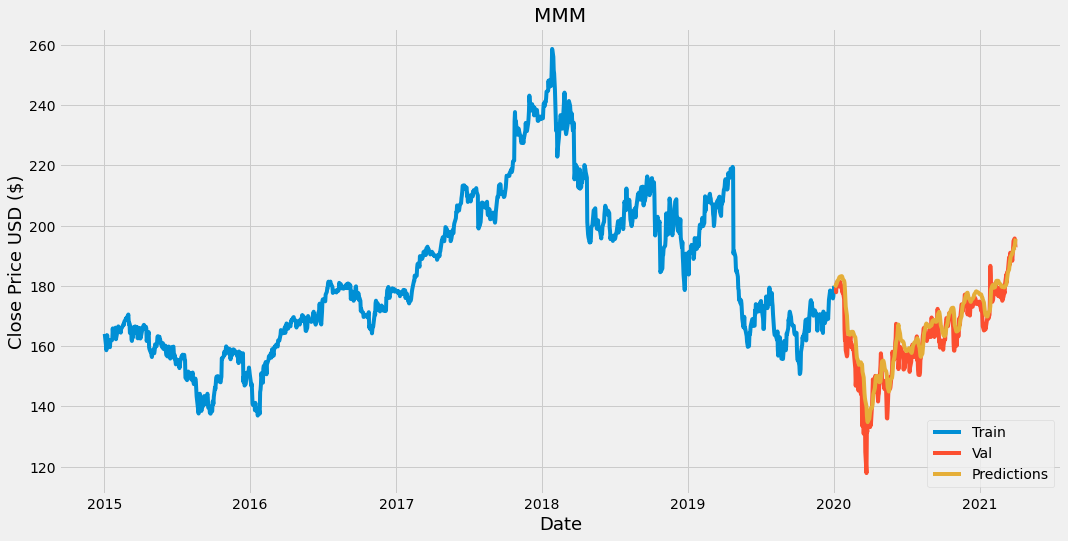

In [24]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title(ticker)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
#show the valid and predicted prices
print(valid.head(100))

                 Close  Predictions
Date                               
2020-01-03  178.449997   179.563812
2020-01-06  178.619995   180.038574
2020-01-07  177.899994   180.414948
2020-01-08  180.630005   180.589188
2020-01-09  181.199997   181.028000
...                ...          ...
2020-05-20  149.679993   146.359940
2020-05-21  145.809998   147.843842
2020-05-22  146.440002   148.839569
2020-05-26  152.080002   149.535004
2020-05-27  158.149994   150.698822

[100 rows x 2 columns]


In [26]:
df = valid['Predictions'] - valid['Close']
mean = 0
counter = 0
for i in df:
    counter = counter + i
    
mean = counter/len(df)
mean

2.946093541042061